In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
scheduler = 'rtds'
B = '4000'
P = '10000'
#filename = '../latencies/latency_' + scheduler + '_' + B + '_' + P + '.txt'
filename = '../latency.txt'

In [36]:
latencies = np.loadtxt(filename)

In [37]:
ns = 1e9
normalized = (latencies)/2.1
print(np.mean(normalized))

1312278766.1542857


In [38]:
ms = normalized/1e6
print(np.median(ms))

1278.5749438095236


Text(0.5,1,'RTDS B=3000 P=10000')

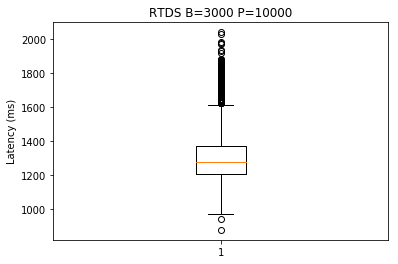

In [39]:
plt.boxplot(ms)
plt.ylabel('Latency (ms)')
plt.title('RTDS B=3000 P=10000')

In [40]:
threshold = 1.8e8
where = np.where(normalized > threshold)
print(len(where[0]))

2000


In [41]:
print(np.median(ms))

1278.5749438095236


Text(0,0.5,'Latency (ms)')

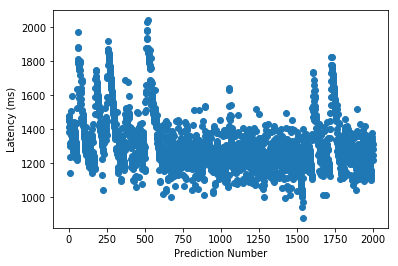

In [42]:
plt.scatter(range(latencies.shape[0]), ms)
plt.xlabel('Prediction Number')
plt.ylabel('Latency (ms)')

In [43]:
print(np.max(ms)-np.min(ms))

1163.083940952381


In [44]:
print(np.min(ms))

877.9831485714285


In [45]:
def longest_decreasing_sublist(a):
  lds, current = [], [a[0]]
  for val in a[1:]:
    if val < current[-1]: current.append(val)
    else:
      lds = current[:] if len(current) > len(lds) else lds
      current = [val]
  lds = current[:] if len(current) > len(lds) else lds
  return lds

lds = longest_decreasing_sublist(ms)

/home/ben/.local/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/ben/.local/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/ben/.local/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=nan, stderr=nan)

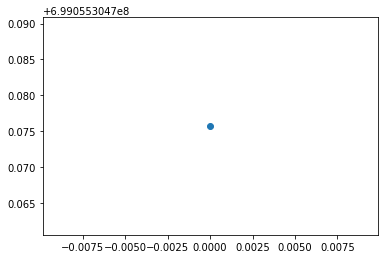

In [28]:
x = range(len(lds))
y = lds
plt.scatter(x, y)
from scipy.stats import linregress
linregress(x, y)